# Find the Best Place for a New Well

### Table of Contents
* [Find the Best Place for a New Well](#scrollTo=s8M4IKZMfTRS)
    * [Machine Learning in Business](#scrollTo=VqwilnTpNjII)
    * [1. Data Preparation and EDA](#scrollTo=f216a9d6)
        * [1.1. Data Preparation](#scrollTo=df6691a7)
            * [1.1.1. Loading All Data and Displaying Sample Data](#scrollTo=RQMUi6I0ZLIp)
            * [1.1.2. Print the Information of Datasets](#scrollTo=YwIJAM05Zv9Y)
            * [1.1.3. Displays Descriptive Statistics of Data](#scrollTo=Hez-TZEKaFIb)
        * [1.2. EDA and Data Visualization](#scrollTo=VGeut5BClGSs)
        * [1.2.1. Region 0](#scrollTo=bmQM2sXZZFDN)
            * [1.2.2 Region 1](#scrollTo=Til7usIYZI2r)
            * [1.2.3. Region 2](#scrollTo=LpyIObMkZNJ-)
    * [2. Split the Data](#scrollTo=LbYtB00MQLVA)
        * [2.1.  Splitting Data into Training and Validation Set](#scrollTo=46MJkhWYhn24)
        * [2.2. Train the Model](#scrollTo=xGCOQVD_hz5-)
            * [2.2.1. Linear Regression](#scrollTo=levZlEbkh4l0)
        * [2.3. Average Volume of Predicted Oil Reserves and RMSE Model](#scrollTo=ctFK4EVUihUJ)
        * [2.4. Analyze the Results](#scrollTo=-2jS_a24ivCG)
    * [3. Profit Calculation Preparation](#scrollTo=dxrQ4R3Wrrif)
        * [3.1 Store all Key Values for Profit Calculation in separate Variables](#scrollTo=dxrQ4R3Wrrif)
    * [4. Create Function to Calculate Profit from a Pool of Oil Wells](#scrollTo=Sceih6gfk7ig)
    * [5. Calculating Risk and Profit for each Region](#scrollTo=TODN9ALJmdek)
        * [5.1. Presenting Findings and Suggestions for New Well Sites](#scrollTo=MhpSpkCblybC)
* [Conclusions](#scrollTo=ODjbHKLCbc7F)



## Machine Learning in Business

We work for the OilyGiant mining company. Our task is to find the best place for a new well.

Steps to choose the location:

- Collecting the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

We have data on oil samples from three regions. Parameters of each oil well in the region are already known. We are going to build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

**Goals:**
- Collect the oil well parameters each regions: oil quality and volume of reserves.
- Build a model for predicting the volume of reserves in the new wells.
- Pick the oil wells with the highest estimated values.
- Pick the region with the highest total profit for the selected oil wells.

## 1. Data Preparation and EDA

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor

### 1.1. Data Preparation

#### 1.1.1. Loading All Data and Displaying Sample Data


In [2]:
# load datasets
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    try:
        df0 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv')
        df1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv')
        df2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv')

    except:
        df0 = pd.read_csv('/content/geo_data_0.csv')
        df1 = pd.read_csv('/content/geo_data_1.csv')
        df2 = pd.read_csv('/content/geo_data_2.csv')

In [3]:
# display sample data df0
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# display sample data df1
df1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
# display sample data df2
df2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


#### 1.1.2. Print the Information of Datasets

In [6]:
# display df0 information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# display df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# display df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


- The three datasets above have the same number of columns and rows, namely **5** columns and **100,000** rows.
- There is no missing value found in the three datasets.
- The data type of the data in the columns is defined correctly; the `id` column is defined as **object** while the `f0`, `f1`, `f2`, and `product` columns are defined as **float**.

#### 1.1.3. Displays Descriptive Statistics of Data

In [9]:
# display descriptive statistics df0
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
# display descriptive statistics df1
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
# display descriptive statistics df2
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### 1.2. EDA and Data Visualization

### 1.2.1. Region 0

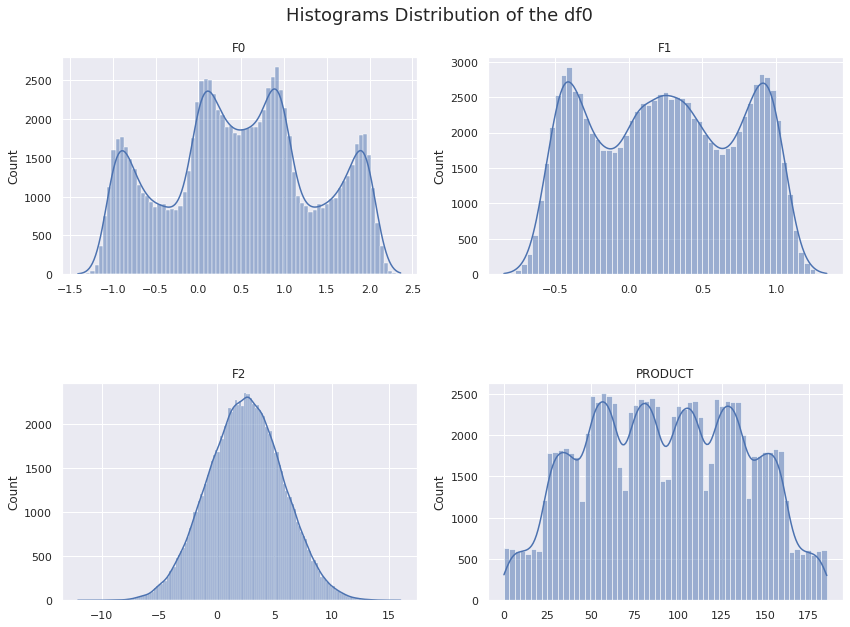

In [12]:
# display df0 visualization
sns.set()

columns = ['f0', 'f1', 'f2', 'product']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df0', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df0[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Columns `f0`, `f1` and `product` are multimodal, meaning they have 2 or more modes.
- Column `f2` has a normal distribution.

#### 1.2.2 Region 1

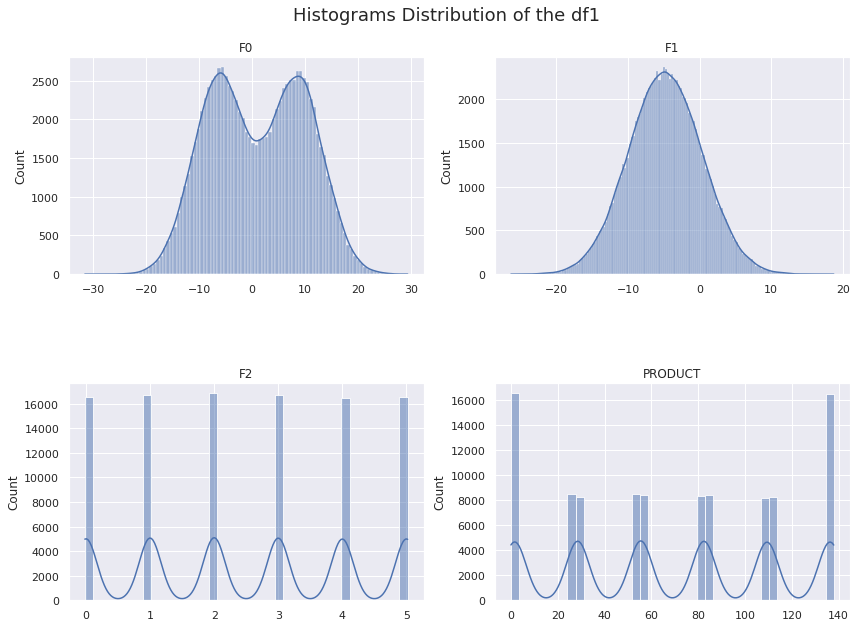

In [13]:
# display df1 visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df1', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df1[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Column `f0` in the df1 dataset has a bimodal distribution, or has two modes.
- Column `f1` in dataset df1 has normal distribution.
- The `f2` and `product` columns in the df1 dataset have an abnormal distribution.


#### 1.2.3. Region 2

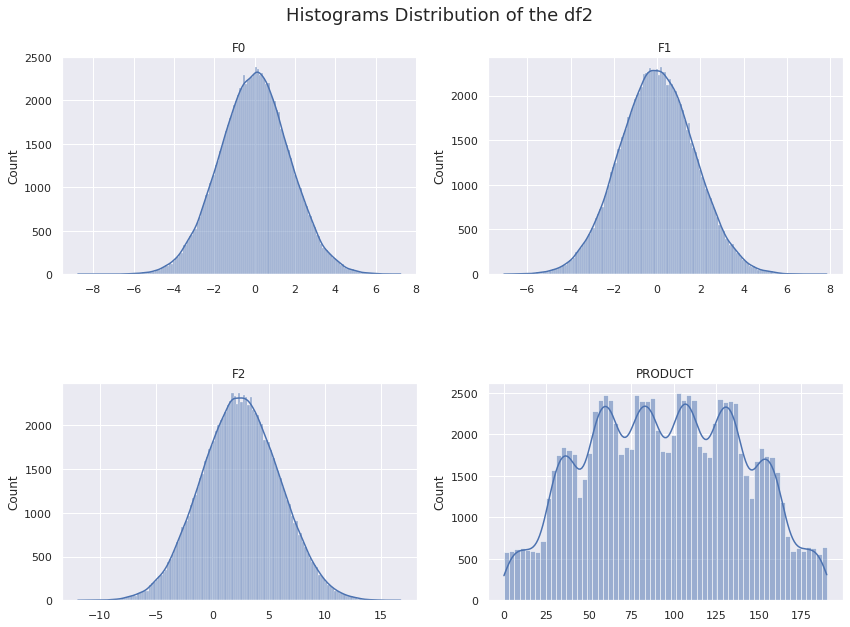

In [14]:
# display df1 visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms Distribution of the df2', fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(columns):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(x=df2[column], kde=True, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

**Findings:**
- Columns `f0`, `f1`, and `f2`, have a multimodal distribution.
- The `product` column has a normal distribution.

## 2. Split the Data

### 2.1.  Splitting Data into Training and Validation Set

We will split the data into two sets, namely the *train set* and *validation set* with a ratio of **75 : 25**.

We will train with a Linear Regression model to calculate **RMSE** values and find new oil well reserves.

In [15]:
# split the datasets
datasets = [df0, df1, df2]

X_train = []
X_valid = []
y_train = []
y_valid = []

In [16]:
# create for loop function to split data
for data in datasets:
        X = data[data.columns.drop(['id', 'product'])]
        y = data['product']
        features_train, features_valid, target_train, target_valid = train_test_split(X, y, test_size = 0.25, 
                                                              random_state=42)
        X_train.append(features_train)
        X_valid.append(features_valid)
        
        y_train.append(target_train)
        y_valid.append(target_valid)

In [17]:
# display the X_train sample
for region in range(len(datasets)):
    display(X_train[region])

,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607
...,...,...,...
6265,1.626462,-0.107752,2.951064
54886,1.682364,-0.193385,-1.175390
76820,0.979059,-0.550693,2.897510
860,0.652792,-0.484070,7.155391


,f0,f1,f2
98980,9.296378,-4.480220,1.999544
69824,15.836796,1.952969,4.989288
9928,-1.594937,-0.407367,3.003358
75599,12.335752,-6.508978,2.001396
95621,-4.954638,-8.026328,1.001472
...,...,...,...
6265,-9.097344,-9.935211,0.996925
54886,2.490913,-3.577409,4.003892
76820,11.419499,3.616041,0.998035
860,-2.206408,-6.205406,0.008217


,f0,f1,f2
98980,-0.592927,-2.323059,5.344840
69824,-0.690844,1.715501,-1.331142
9928,1.741680,-1.604639,0.499745
75599,-1.354850,0.984588,5.683113
95621,1.075114,1.175117,1.010025
...,...,...,...
6265,-1.842672,-0.003145,0.926830
54886,0.079216,1.076507,3.761491
76820,-2.285696,1.500897,-1.051454
860,-1.446403,-2.164471,3.334692


In [18]:
# display the y_valid sample
for region in range(len(datasets)):
    display(y_valid[region])

75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: product, Length: 25000, dtype: float64

75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
            ...    
21271    107.813044
34014     53.906522
81355     26.953261
65720    110.992147
11627    134.766305
Name: product, Length: 25000, dtype: float64

75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
            ...    
21271     40.797226
34014     87.144239
81355     52.039812
65720    136.961454
11627    109.173206
Name: product, Length: 25000, dtype: float64

### 2.2. Train the Model

#### 2.2.1. Linear Regression

In [19]:
# create RMSE function
def rmse_score(x, y):
    square_root = sqrt(mean_squared_error(x, y))
    return square_root

In [20]:
# create linear regression model function
lr_results = defaultdict(list)

predictions_valid = [] # for profit calculation

for region in range(len(datasets)):
    model = LinearRegression()
    model.fit(X_train[region], y_train[region])

    y_pred_train = model.predict(X_train[region])
    y_pred_valid = model.predict(X_valid[region])
    
    predictions_valid.append(pd.Series(y_pred_valid))

    lr_results['region'].append(region)
    lr_results['rmse_train'].append(rmse_score(y_train[region], y_pred_train))
    lr_results['rmse_valid'].append(rmse_score(y_valid[region], y_pred_valid))
    lr_results['avg_train'].append(y_train[region].mean())
    lr_results['avg_valid'].append(y_valid[region].mean()) 

### 2.3. Average Volume of Predicted Oil Reserves and RMSE Model

In [21]:
# print the result of linear regression model
lr_results = pd.DataFrame(lr_results)
lr_results

,region,rmse_train,rmse_valid,avg_train,avg_valid
0,0,37.670499,37.756600,92.558015,92.325956
1,1,0.890420,0.890280,68.858206,68.725381
2,2,40.025181,40.145872,94.949667,95.150999


### 2.4. Analyze the Results

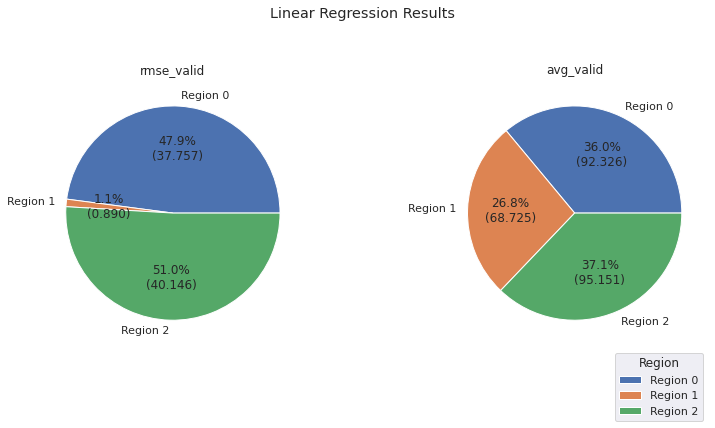

In [22]:
# create pie chart to show the results
palette_color = sns.color_palette('pastel')[0:5]
label = ['Region 0', 'Region 1', 'Region 2']

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2);
plt.subplots_adjust(wspace=0.5)

ax[0].pie(lr_results['rmse_valid'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(lr_results["rmse_valid"]):,.3f})')
ax[0].set_title('rmse_valid')
ax[1].pie(lr_results['avg_valid'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(lr_results["avg_valid"]):,.3f})')
ax[1].set_title('avg_valid')

plt.legend(loc='best', bbox_to_anchor=(1,0), title='Region')
plt.suptitle('Linear Regression Results')
plt.show()

**Findings:**
- We can see that the **RMSE** values of the train set and validation set have a similar score, meaning that neither underfitting nor overfitting occurs in the two data.
- We can consider **Region 2** for development because it has the highest average reserve value of **95.150999**, but remember that this region also has the highest **error** of **40.145872** .

We need to do further analysis to be able to determine the probability of profit or loss that can occur.

## 3. Profit Calculation Preparation
### 3.1 Store all Key Values for Profit Calculation in separate Variables

In [23]:
# counting the number of products to gain 0 profit

budget = 100000000 # budget
wells_to_dig = 200 # number of wells to be dug

cost_per_well = budget / wells_to_dig # cost of digging one well
points_per_budget = budget // cost_per_well # point per budget

product_price = 4500 # price per product = 1000 barrels

cost_per_point = budget / points_per_budget # cost per point
zero_profit_product = cost_per_point / product_price # products needed to generate 0 profit

print('Number of products required to generate profit $0 =', zero_profit_product)

Number of products required to generate profit $0 = 111.11111111111111


**Findings:**
- Products needed to get Return of Investment are **111** products or **111,000** barrels.
- In the previous analysis, **Region 2** has the highest average oil reserves with **95** products that can be produced. However, this amount needs to be increased to generate **0** profit.

## 4. Create Function to Calculate Profit from a Pool of Oil Wells

In [24]:
# create fuction to calculate the profit

def profit(target, predictions):
    predictions_sorted = predictions.reset_index(drop=True).sort_values(ascending=False) # validation set product quantity prediction result
    selected_points = target.reset_index(drop=True).iloc[predictions_sorted.index][:200] # number of products in the validation set
    product = selected_points.sum() # number of products in the validation set
    revenue = product * product_price # revenue = product × product price
    cost = budget
    
    return revenue - cost # revenue - cost

In [25]:
# calculate the profit without bootstrapping
profit_outcome = defaultdict(list)

for region in range(len(datasets)):
    profit_outcome['region'].append(region)
    profit_outcome['profit'].append(profit(y_valid[region], predictions_valid[region]))

pd.set_option('display.float_format',  '{:,f}'.format)
pd.DataFrame(profit_outcome)

,region,profit
0,0,"33,591,411.144622"
1,1,"24,150,866.966815"
2,2,"25,985,717.593741"


**Findings:**
- Without **bootstrapping** the highest profit is obtained in **Region 0**.

## 5. Calculating Risk and Profit for each Region

In [26]:
# create boostrap function to calculet the profit

state = np.random.RandomState(42)
profit_boost = defaultdict(list)

for region in range(3):
    target = y_valid[region]
    predictions = predictions_valid[region]
    
    profit_values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        predicted_valid_subsample = pd.Series(predictions).iloc[target_subsample.index]
        profit_values.append(profit(target_subsample, predicted_valid_subsample))
    profit_values = pd.Series(profit_values)
        
    mean_profit = profit_values.mean()
    lower_quantile = profit_values.quantile(0.025)
    upper_quantile = profit_values.quantile(0.975)
    negative_profit_chance = (profit_values < 0).mean() * 100 
  
    profit_boost['region'].append(region)
    profit_boost['avg_profit'].append(mean_profit)
    profit_boost['lower_quantile'].append(lower_quantile)
    profit_boost['upper_quantile'].append(upper_quantile)
    profit_boost['risk_of_losses'].append(negative_profit_chance)

In [27]:
# show the profit and risk of losses results
pd.set_option('display.float_format',  '{:,.2f}'.format)
profit_boost = pd.DataFrame(profit_boost)
profit_boost

,region,avg_profit,lower_quantile,upper_quantile,risk_of_losses
0,0,"3,995,754.78","-1,104,678.95","8,974,603.28",6.00
1,1,"4,525,765.94","523,094.10","8,301,463.13",0.90
2,2,"3,787,059.04","-1,277,794.35","9,079,234.83",7.50


### 5.1. Presenting Findings and Suggestions for New Well Sites

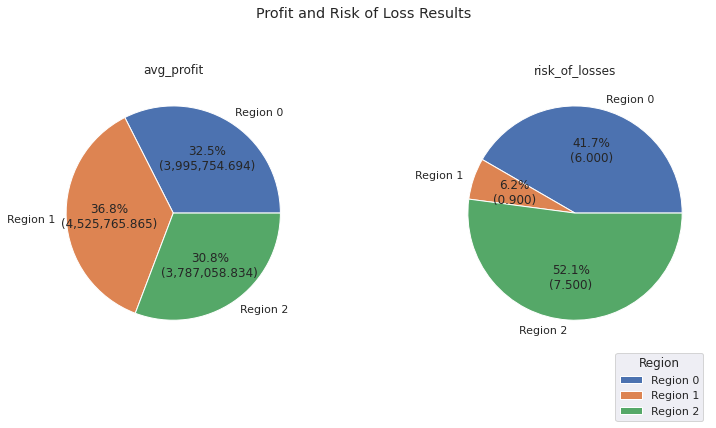

In [28]:
# create pie chart to show the profit results
palette_color = sns.color_palette('pastel')[0:5]
label = ['Region 0', 'Region 1', 'Region 2']

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2);
plt.subplots_adjust(wspace=0.5)

ax[0].pie(profit_boost['avg_profit'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profit_boost["avg_profit"]):,.3f})')
ax[0].set_title('avg_profit')
ax[1].pie(profit_boost['risk_of_losses'], labels=label, 
            autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profit_boost["risk_of_losses"]):,.3f})')
ax[1].set_title('risk_of_losses')

plt.legend(loc='best', bbox_to_anchor=(1,0), title='Region')
plt.suptitle('Profit and Risk of Loss Results')
plt.show()

**Findings:**
- The results of the bootstrapping technique that we did for us set a value for the subsample of **1,000** and a confidence interval value of **0.90%** to calculate the average profit, confidence interval and risk of losses, the best area for the construction of new wells is obtained in **Region 2**.
- In these areas, the highest average profit is **4,525,765**, the lowest loss risk is **0.90%** and below the specified threshold value is **2.5%**.
- The region also has the lowest confidence interval with no minus value in the lower quantile between **523,094** to **8,301,463** for the upper quantile.

# Conclusions

**1. Data Preparation**
- We start by loading 3 datasets consisting of **5** columns and **100,000** rows each.
- There is no missing value found in the three datasets, the data types in the columns are defined correctly, the `id` column is defined as **object** while the `f0`, `f1`, `f2`, and `product` is defined as **float**.
- In **Region 2**, the `f0`, `f1` and `f2` columns have a multimodal distribution, and the `product` column has a normal distribution.

**2. EDA and Data Visualization**
- In **Region 0**, the columns `f0`, `f1`, and `product` have a multimodal form, meaning that these columns have 2 or more modes; the `f2` column has a normal distribution.
- In **Region 1** column `f0` in dataset df1 has a bimodal distribution, column `f1` in dataset df1 has normal distribution, column `f2` and `product` in dataset df1 has abnormal distribution.

**3. Split the Data**
- We will divide the data into two sets, namely the  train set and validation set with a ratio of **75 : 25**.
- We use the `f0`, `f1`, and `f2` fields as features set and the `product` field as target set; we also drop the `id` fields, which are not needed to create the model.

**4. Model**
- We can get **RMSE** values from train set and validation set having a similar *score*, meaning that neither underfitting nor overfitting occurs in the two data.
- We will consider **Region 2** for development because it has the highest average reserve value but keep in mind that it also has the highest **error**.

**5. Calculate the Profit**
- The results of the bootstrapping technique that we used to calculate the average Profit, confidence interval and risk of losses obtained the best area for the location of the construction of a new well in **Region 2**.
- In these areas, the highest average profit is **4,525,765**, the lowest loss risk is **0.90%** and below the specified threshold value.
- The region also has the lowest confidence interval with no minus value in the lower quantile.


**Main Conclusion**

We found the best area to develop new wells in **Region 1**. In this area, we get the highest average Profit and the lowest risk of loss.